<a href="https://colab.research.google.com/github/Sucinthar-Saravanan/Churn-Predicition-System/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
df.shape

(10002, 14)

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


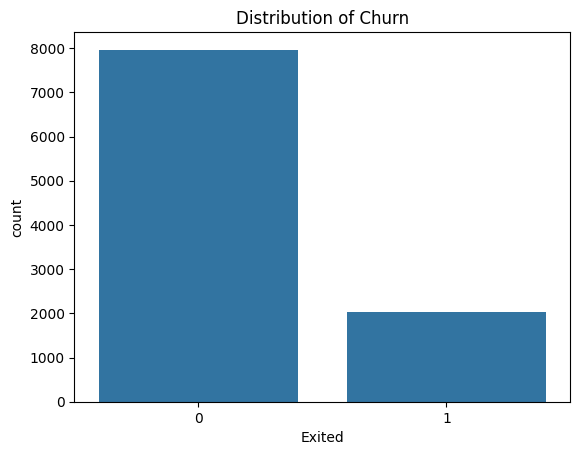

In [ ]:
sns.countplot(data=df, x='Exited')
plt.title('Distribution of Churn')
plt.show()

<ipython-input-14-3600f7325d2c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


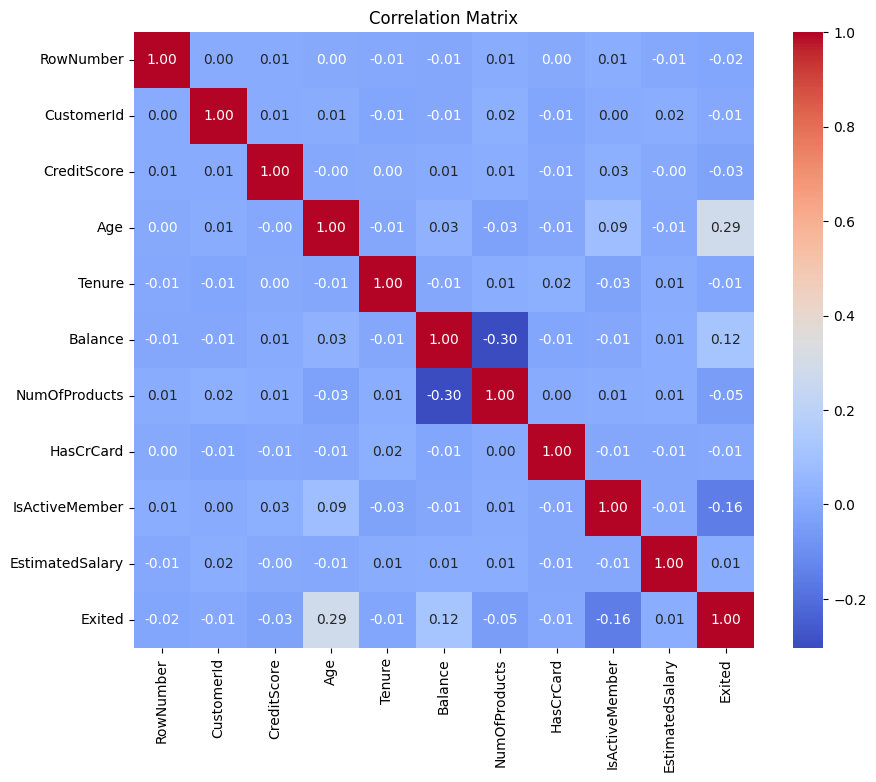

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

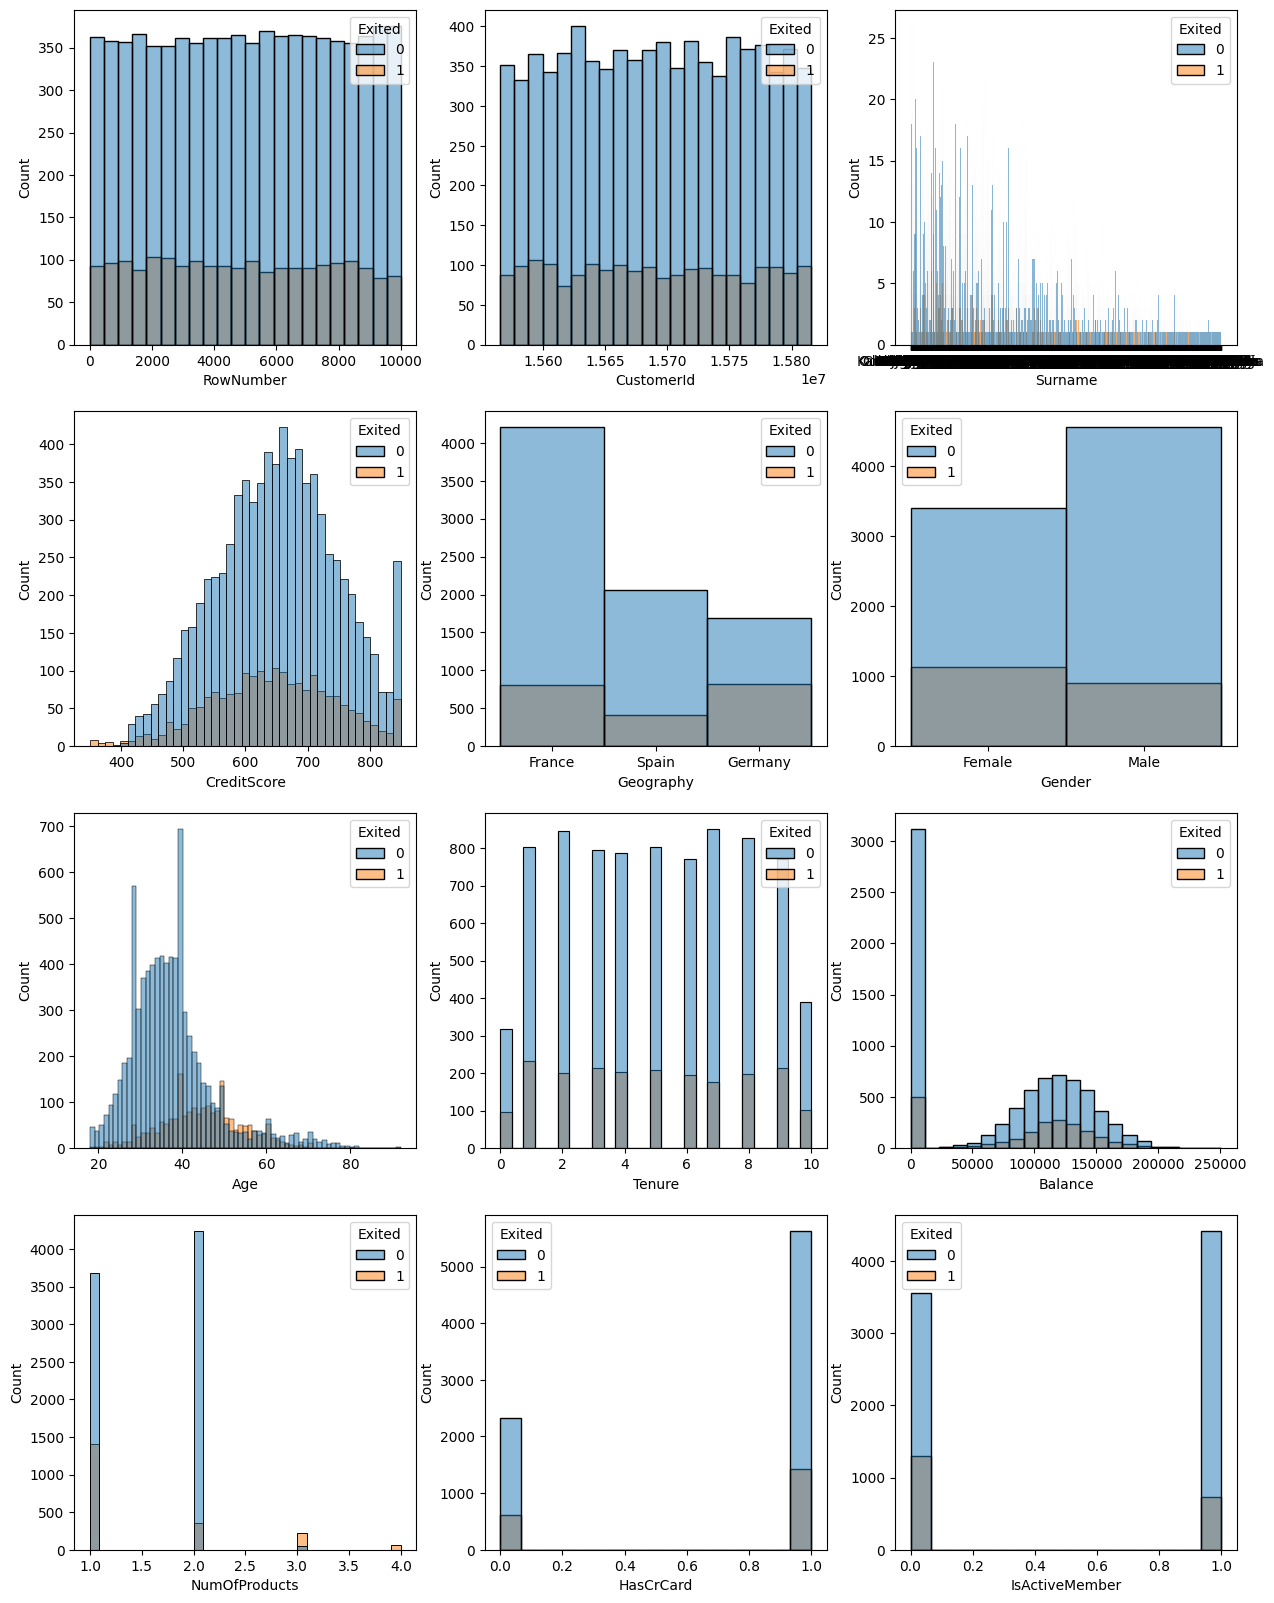

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axs = axs.flat
num_columns = min(len(df.columns) - 1, len(axs))

for i in range(num_columns):
    sns.histplot(data=df, x=df.columns[i], hue="Exited", ax=axs[i])

plt.show()

In [ ]:
df = df.drop_duplicates()
df.shape

(10000, 14)

In [ ]:
df = df.dropna()
df.shape

(9996, 14)

In [ ]:
df = df.drop('Surname',axis=1)
df = pd.get_dummies(df, columns=['Geography','Gender'])

In [ ]:
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0,1,0
1,2,15647311,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1,1,0
2,3,15619304,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0,1,0
3,4,15701354,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0,1,0
5,6,15574012,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1,0,0,1,0,1


In [ ]:
x = df.drop('Exited',axis=1)
x.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,0,0,1,0
1,2,15647311,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,1,1,0
2,3,15619304,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,0,0,1,0
3,4,15701354,699,39.0,1,0.00,2,0.0,0.0,93826.63,1,0,0,1,0
5,6,15574012,645,44.0,8,113755.78,2,1.0,0.0,149756.71,0,0,1,0,1


In [ ]:
y = df['Exited']

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
model_dt = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8)

In [ ]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred = model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model_dt.score(x_test,y_test)

0.8605

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1599
           1       0.74      0.46      0.57       401

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred=model_rf.predict(x_test)

In [ ]:
model_rf.score(x_test,y_test)

0.8525

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1599
           1       0.92      0.29      0.44       401

    accuracy                           0.85      2000
   macro avg       0.88      0.64      0.68      2000
weighted avg       0.86      0.85      0.82      2000



In [ ]:

sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [ ]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [ ]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [ ]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [ ]:
print(metrics.classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       648
           1       0.89      0.91      0.90      1000

    accuracy                           0.88      1648
   macro avg       0.87      0.87      0.87      1648
weighted avg       0.88      0.88      0.88      1648



**Performing PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [ ]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
yr_predict_pca = model.predict(xr_test_pca)

In [ ]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [ ]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7057038834951457
              precision    recall  f1-score   support

           0       0.69      0.46      0.55       648
           1       0.71      0.86      0.78      1000

    accuracy                           0.71      1648
   macro avg       0.70      0.66      0.67      1648
weighted avg       0.70      0.71      0.69      1648



**Pickling the model**

In [ ]:
import pickle

In [ ]:
filename = 'model.sav'

In [ ]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [ ]:
load_model = pickle.load(open(filename, 'rb'))

In [ ]:
model_score_r1 = load_model.score(xr_test1, yr_test1)
model_score_r1

0.8774271844660194

Gradient Boosting Classifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
smote_gb_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
])

cv_scores = cross_val_score(smote_gb_pipeline, x_train, y_train, cv=5, scoring='accuracy')

print("Cross-validated Accuracy:", cv_scores.mean())

smote_gb_pipeline.fit(x_train, y_train)

y_pred = smote_gb_pipeline.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Cross-validated Accuracy: 0.8546786272670419
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1599
           1       0.69      0.58      0.63       401

    accuracy                           0.86      2000
   macro avg       0.79      0.76      0.77      2000
weighted avg       0.86      0.86      0.86      2000



In [ ]:
from xgboost import XGBClassifier

smote_xgb_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
])

cv_scores_xgb = cross_val_score(smote_xgb_pipeline, x_train, y_train, cv=5, scoring='accuracy')

print("XGBoost Cross-validated Accuracy:", cv_scores_xgb.mean())


XGBoost Cross-validated Accuracy: 0.8475500312695434


In [ ]:
from lightgbm import LGBMClassifier
smote_lgbm_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
])

cv_scores_lgbm = cross_val_score(smote_lgbm_pipeline, x_train, y_train, cv=5, scoring='accuracy')

print("LightGBM Cross-validated Accuracy:", cv_scores_lgbm.mean())


[LightGBM] [Info] Number of positive: 5088, number of negative: 5088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2065
[LightGBM] [Info] Number of data points in the train set: 10176, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 5088, number of negative: 5088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2065
[LightGBM] [Info] Number of data points in the train set: 10176, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.00000

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

classifiers = [
    ('smote_xgb', smote_xgb_pipeline),
    ('smote_lgbm', smote_lgbm_pipeline)
]

ensemble_pipeline = VotingClassifier(classifiers)

cv_scores_ensemble = cross_val_score(ensemble_pipeline, x_train, y_train, cv=5, scoring='accuracy')

print("Ensemble (Voting) Cross-validated Accuracy:", cv_scores_ensemble.mean())


[LightGBM] [Info] Number of positive: 5088, number of negative: 5088
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2065
[LightGBM] [Info] Number of data points in the train set: 10176, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 5088, number of negative: 5088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2065
[LightGBM] [Info] Number of data points in the train set: 10176, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 5088, number of negative